In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'Mar' : {
        'vmin' : 160, 
        'vmax' : 1800},
    'Sep' : {
        'vmin' : 18, 
        'vmax' : 180},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}


In [3]:
def Times(data):
    dat = data.time.values
    dat = pandas.to_datetime(dat, format='%y')
    month = dat.strftime('%b')
    year = dat.strftime('%Y')
    day =  dat.strftime('%d')
    
    return(month, year, day)


def Params(dic, var):
    if(dic['cmap']==None):
        dic['cmap'] = 'magma'
        
    if(dic['orientation']==None):
        dic['orientation'] = 'vertical'
    
    if(dic['title_cbr']==None):
        dic['title_cbr'] = str(var.long_name)
    return(dic)


def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


def Axes_sel(Ncols, axs, i, j):
    if (Ncols == 1):
            ax = axs[i]
    else:
            ax = axs[i,j]
    return(ax)


def Reg(ax):
    import matplotlib.patches as mpatches
    #Lab
    ax.add_patch(mpatches.Rectangle(xy=[-55, 56], width=4, height=3,
                                        facecolor='black',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #Irm
    ax.add_patch(mpatches.Rectangle(xy=[-39, 58], width=4, height=3,
                                        facecolor='red',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #Gul
    ax.add_patch(mpatches.Rectangle(xy=[-57, 35], width=4, height=3,
                                        facecolor='green',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #NE
    ax.add_patch(mpatches.Rectangle(xy=[-20, 50], width=4, height=3,
                                        facecolor='m',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )

#plt.savefig('Regions.pdf', bbox_inches='tight')

In [27]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
c_isas = xr.open_dataset(dir_2 + fl_n2, autoclose=True)


mld_i = c_isas.MLDP
mld_a = c_armor.mlotst


month_a = mld_a.groupby('time.month').mean('time')
month_i = mld_i.groupby('time.month').mean('time')


month_a

/usr/local/lib/python3.5/dist-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'mlotst' (month: 12, latitude: 300, longitude: 560)>
dask.array<shape=(12, 300, 560), dtype=float32, chunksize=(1, 300, 560)>
Coordinates:
  * latitude   (latitude) float32 10.125 10.375 10.625 ... 84.375 84.625 84.875
  * longitude  (longitude) float32 -89.875 -89.625 -89.375 ... 49.625 49.875
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Selection of the regions to work on

In this sectionwe can find the regions selected to calculate the seasonal cycle of the MLD. The regions were chosen 

In [18]:
data_sets = [month_i.sel(depth=1,month=3), month_a.sel(month=3) ]
names = ['ISAS', 'ARMOR-3D']

month = 'Mar'
projection = ccrs.PlateCarree(360)
region = [-90, 0, 10, 70]    #Lon, Lat

<IPython.core.display.Javascript object>


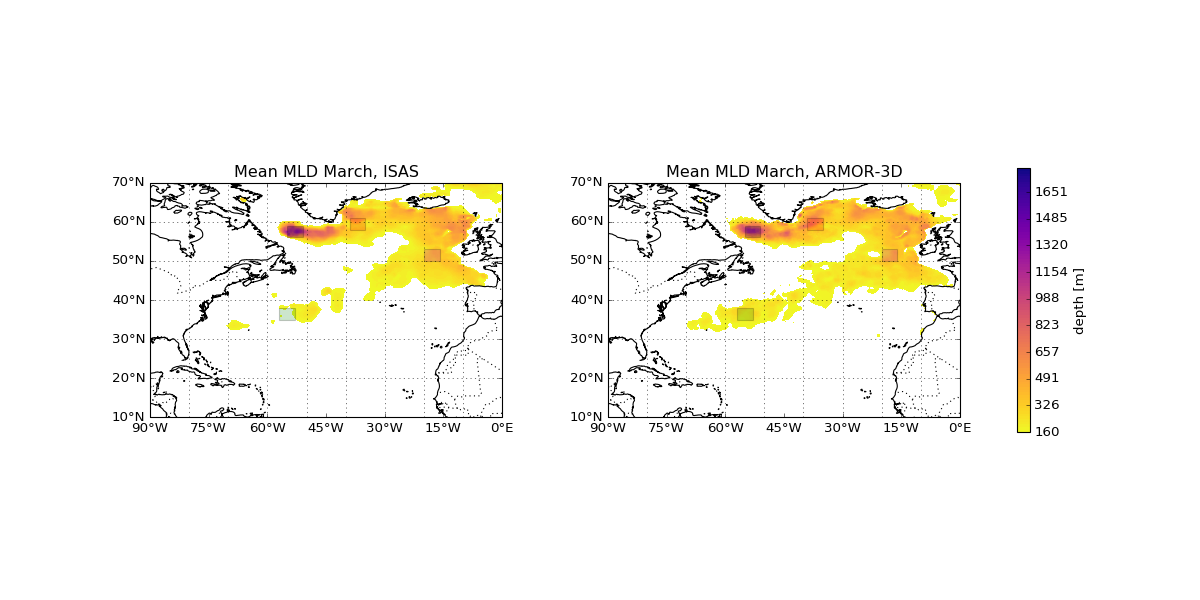

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [19]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection=projection), 
                        figsize=(15, 7.5))

for i,data in enumerate(data_sets):
    x_n, y_n = Grid(data)
    vmin = Range_MLD[month]['vmin']
    vmax = Range_MLD[month]['vmax']
    
    ax[i].set_global()
    ax[i].coastlines('50m')
    ax[i].set_xticks([-90, -75, -60, -45, -30, -15, 0], crs=ccrs.PlateCarree())
    ax[i].set_yticks([10, 20, 30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()

    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    ax[i].add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax[i].set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
    ax[i].gridlines()
    
    contr = ax[i].contourf(x_n, y_n, data, levels=np.linspace(vmin,vmax,100), cmap='plasma_r')
    ax[i].set_title('Mean MLD March, ' + names[i]  )
    
    Reg(ax[i])
    
fig.colorbar(contr, ax=[ax[1]], shrink=0.55, location='right', label=color_bar['title_cbr'])
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.3)
plt.show()    

In [20]:
regions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    }
}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  import sys


<IPython.core.display.Javascript object>


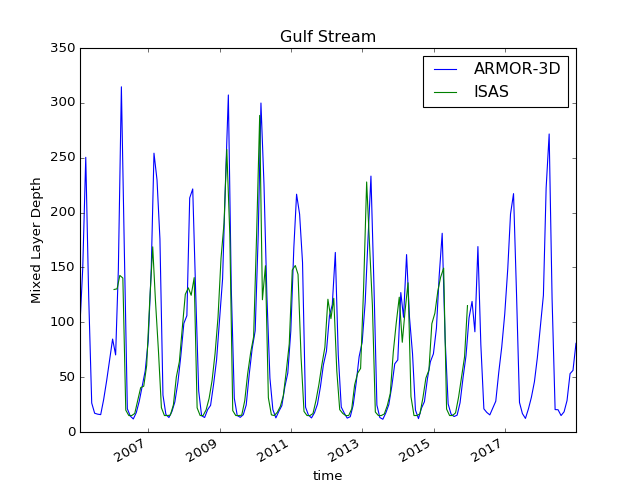

In [25]:
coord = 'gul'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))


#print(data_a, '\n', data_i)
%matplotlib notebook
datm_a.plot.line(label='ARMOR-3D')
datm_i[:,0].plot.line(label='ISAS')

plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper right')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  import sys


<IPython.core.display.Javascript object>


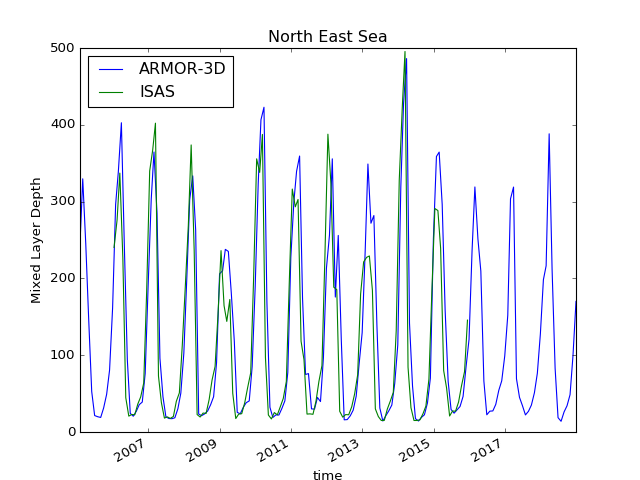

In [21]:
coord = 'noe'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook
datm_a.plot.line(label='ARMOR-3D')
datm_i[:,0].plot.line(label='ISAS')

plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  import sys


<IPython.core.display.Javascript object>


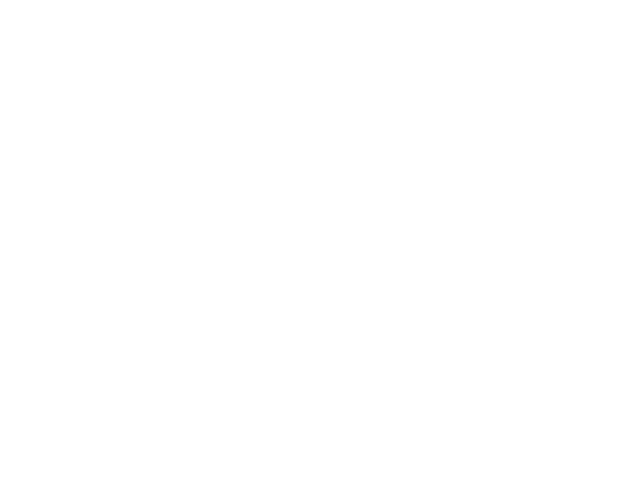

In [10]:
coord = 'lab'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook
datm_a.plot.line(label='ARMOR-3D')
datm_i[:,0].plot.line(label='ISAS')

plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')

In [11]:
coord = 'irm'

lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  


<IPython.core.display.Javascript object>


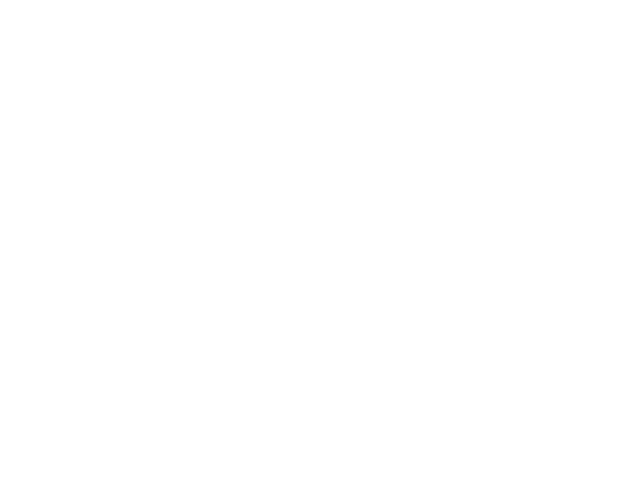

In [12]:
%matplotlib notebook
datm_a.plot.line(label='ARMOR-3D')
datm_i[:,0].plot.line(label='ISAS')

plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')

In [13]:
var1 = c_armor.zo[0,0]
var2 = c_armor.mlotst[0]



<IPython.core.display.Javascript object>


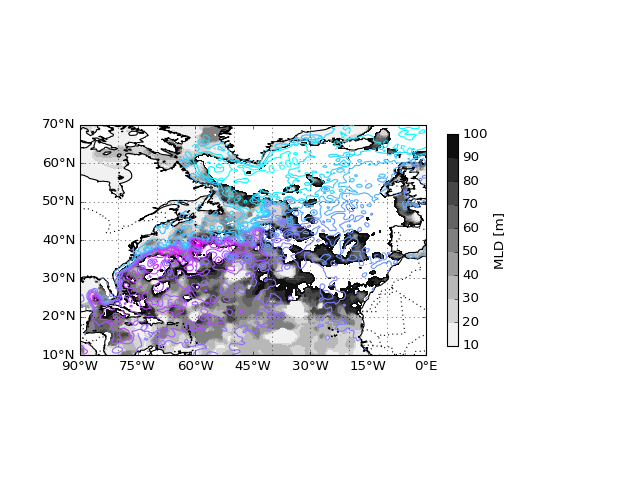

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [14]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection=projection))

x_n, y_n = Grid(var2)
vmin = var2.min()  #Range_MLD['Mar']['vmin']
vmax = var2.max()  #Range_MLD['Mar']['vmax']

ax.set_global()
ax.coastlines('50m')
ax.set_xticks([-90, -75, -60, -45, -30, -15, 0], crs=ccrs.PlateCarree())
ax.set_yticks([10, 20, 30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
ax.gridlines()

contr1 = ax.contour(x_n, y_n, var1, 15, cmap='cool', add_colorbar=False)
contr2 = ax.contourf(x_n, y_n, var2, levels=np.linspace(10,100,10), cmap='gist_gray_r')
ax.clabel(contr1, inline=1, fontsize=10)
ax.set_title('')

#fig.colorbar(contr1, ax=ax, shrink=0.55, orientation='vertical', label='GH [m]')
fig.colorbar(contr2, ax=ax, shrink=0.55, orientation='vertical', label='MLD [m]')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.3)
plt.show()    